In [42]:
import numpy as np
from sklearn.datasets  import make_regression
import matplotlib.pyplot as plt

# 1.Dataset

In [43]:
x,y=make_regression(n_samples=100,n_features=1,noise=10)

In [44]:
y

array([ 129.84931148,   50.3267662 ,  -34.30975615,   26.24129558,
        -40.35694234,   48.07843866,   81.97595307,  -85.53591357,
        -34.97071846,   -9.70107884,  124.02523282,   -3.58349721,
        -72.87811011,   32.03194717,  -18.16264279,  -19.01813469,
        -50.55946848,  -70.69215338,  -58.78338941,   71.55133154,
        -40.05081139,   12.0820008 ,  -50.5078642 ,   -3.54952004,
        -14.75243966,  -30.3495311 ,  -19.81871628,   51.45187882,
         20.19493196,  134.53859922,  -64.87724652,  -57.56710368,
       -132.33610992,  -29.12767677,   -7.56699248, -112.72917162,
         59.2657242 ,   27.07178212,  150.98341141,    1.98173259,
        -10.36140597,   92.82285102,   11.76430354,   32.96912763,
        -41.54967611,   27.08242628,   64.95833453,  -13.35520882,
        -94.81076372,    3.14843914, -115.68274156, -121.6594684 ,
        -75.58366339,    1.43425124,  100.16422158,  -83.29605398,
          3.28473553, -152.03315912, -165.10345025,   37.22720

In [45]:
x

array([[ 1.25751736e+00],
       [ 5.46956783e-01],
       [-2.92915841e-01],
       [ 4.57654561e-01],
       [-3.68649018e-01],
       [ 6.68747691e-01],
       [ 8.86471140e-01],
       [-9.28387670e-01],
       [-4.10747547e-01],
       [-1.56252717e-01],
       [ 1.33969417e+00],
       [ 1.14184743e-01],
       [-9.11283055e-01],
       [ 4.82988331e-01],
       [-3.58911787e-01],
       [-3.12699802e-01],
       [-6.04330630e-01],
       [-8.49079503e-01],
       [-4.98213906e-01],
       [ 7.10049028e-01],
       [-3.78959450e-01],
       [ 4.90965088e-02],
       [-7.26204939e-01],
       [-4.86949258e-02],
       [ 9.27483392e-02],
       [-2.75329333e-01],
       [-3.24698509e-01],
       [ 5.67741744e-01],
       [ 2.74192727e-01],
       [ 1.63751612e+00],
       [-6.75067302e-01],
       [-7.13091700e-01],
       [-1.50752167e+00],
       [-1.95975475e-01],
       [-8.79222998e-02],
       [-1.35978950e+00],
       [ 6.29389081e-01],
       [ 2.56182948e-01],
       [ 1.4

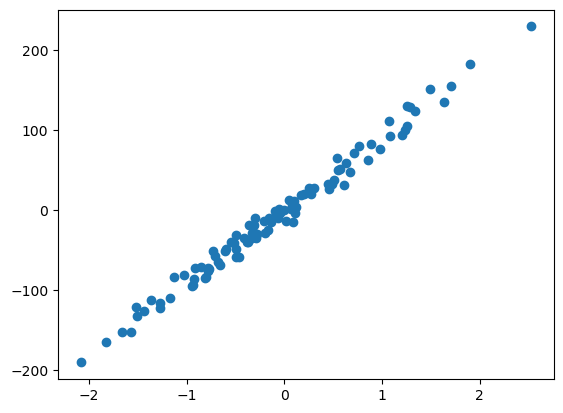

In [46]:
plt.scatter(x,y)

In [47]:
print(x.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [48]:
#matrice X
X=np.hstack((x,np.ones(x.shape)))
X.shape


(100, 2)

In [49]:
theta=np.random.randn(2,1)
theta.shape
theta

array([[0.47175291],
       [2.67538836]])

# 2.Modele Lineaire

In [50]:
def model(X,theta):
    return X.dot(theta)

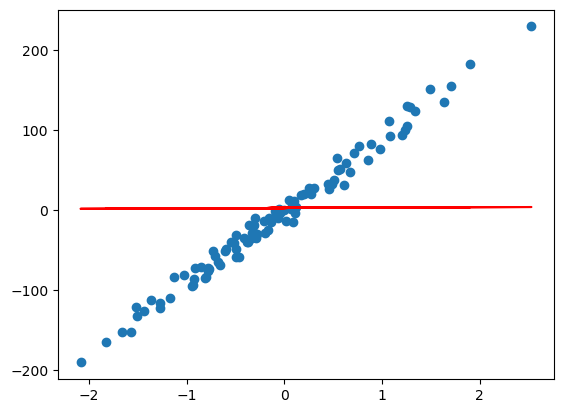

In [51]:
plt.scatter(x,y)
plt.plot(x,model(X,theta),c='r')

# 3.fonction cout

In [52]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [53]:
cost_function(X,y,theta)

3182.4905221915333

# 4.Gradients et Descente de Gradient

In [54]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [55]:
grad(X,y,theta)

array([[-69.86929209],
       [ 11.3634681 ]])

In [71]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    
    cost_history=np.zeros(n_iterations)
    
    for i in range(0,n_iterations):
        theta=theta-learning_rate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta,cost_history

# 5.Entrainement du modele

In [72]:
theta_final,cost_history=gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1000)

In [73]:
theta_final

array([[89.68743097],
       [-0.72050398]])

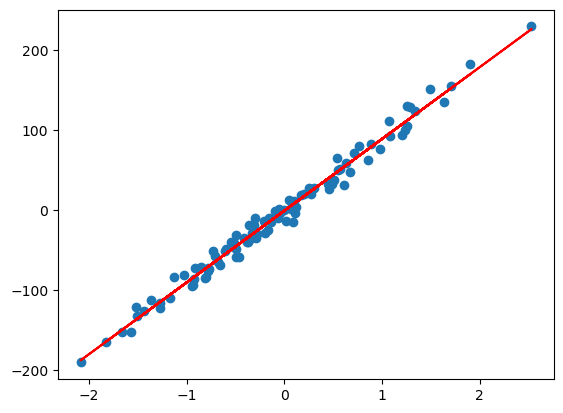

In [74]:
predictions=model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c='r')

# 6.Courbe d'apprentissage

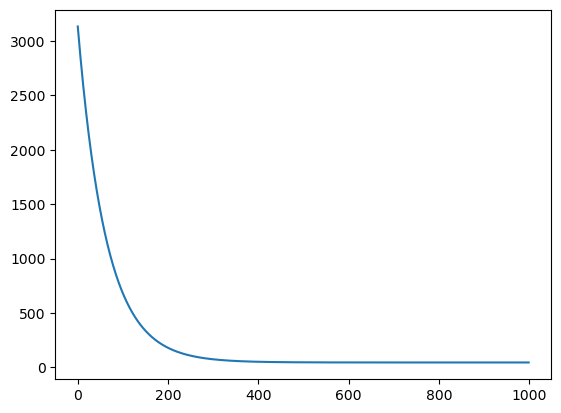

In [75]:
plt.plot(range(1000),cost_history)

# 7.Coefficient de determination = R squared

In [79]:
def R_squared(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1 - (u/v)

In [80]:
R_squared(y,predictions)

0.9857026890244687